**Assignment 2- CNN**

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense
from keras import optimizers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


In [ ]:
# Create train and test dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


1.a. start with creating a visualization of your input data

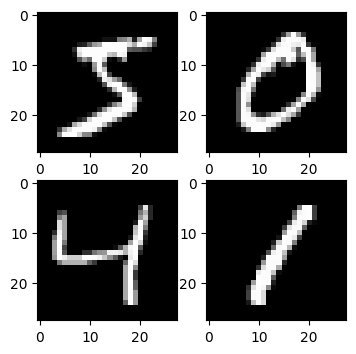

In [ ]:
#1.a. Create the visualization here
# Let's look into the dataset by visualizing some data points
plt.figure(figsize=(4, 4))
for i in range(0,4):
  ax = plt.subplot(2, 2, i + 1)
  plt.imshow(X_train[i],cmap = 'gray')
plt.show()

In [ ]:
#preprocessing
# Keras allows us to add the number of channels either to the beginning of shape or the end of it
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
# You need to apply some preprocessing on X and y
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test/ 255

# Encode outputs
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

1.b. Create a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has one hidden layer (512 nodes). Draw the Learning curve. What is your understanding from learning curve? Batch size=128 and epochs=20

In [ ]:
#1.b.
# Create model here
model=Sequential()
model.add(Conv2D(32,5,activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(32,5,activation='relu'))
model.add(Conv2D(64,5,activation='relu'))
model.add(Conv2D(64,5,activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 [==============================] - 19s 14ms/step - loss: 0.1623 - accuracy: 0.9501 - val_loss: 0.0596 - val_accuracy: 0.9834
Epoch 2/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.0451 - val_accuracy: 0.9866
Epoch 3/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0441 - val_accuracy: 0.9877
Epoch 4/20
375/375 [==============================] - 5s 12ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 5/20
375/375 [==============================] - 5s 12ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0625 - val_accuracy: 0.9823
Epoch 6/20
375/375 [==============================] - 4s 12ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0452 - val_accuracy: 0.9891
Epoch 7/20
375/375 [==============================] - 5s 12ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0400 - val_accuracy: 0.988

In [ ]:
# Measure test accuracy
scores = model.evaluate(X_test,y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0479 - accuracy: 0.9898
Accuracy: 98.98%


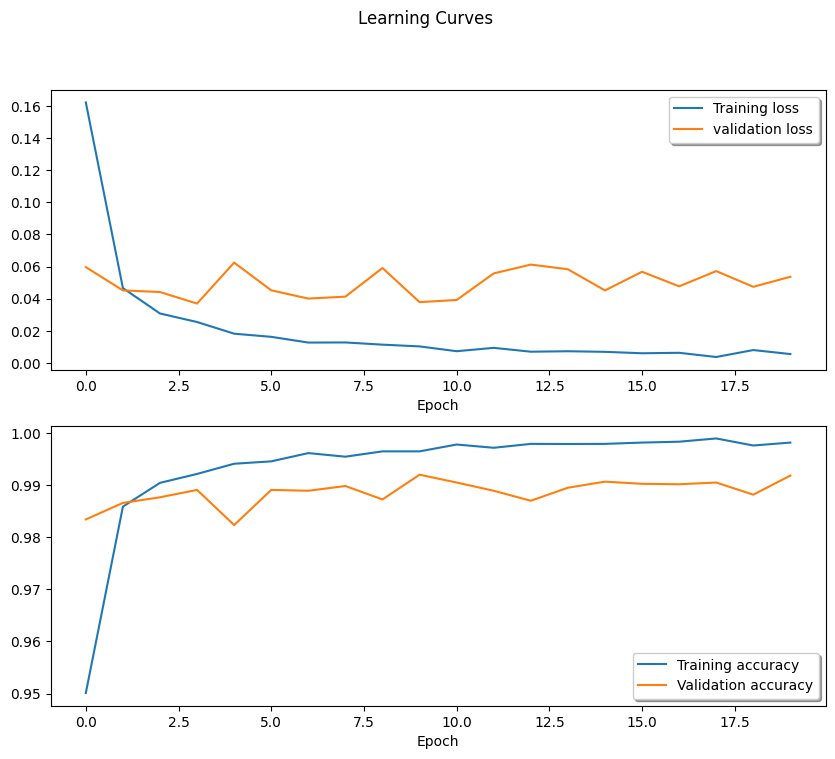

In [ ]:
# Draw Learning curve
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves
  fig, ax = plt.subplots(2,1,figsize=(10,8))
  fig.suptitle('Learning Curves')
  ax[0].plot(hist.history['loss'], label="Training loss")
  ax[0].plot(hist.history['val_loss'], label="validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)
  ax[0].set_xlabel('Epoch')

  ax[1].plot(hist.history['accuracy'], label="Training accuracy")
  ax[1].plot(hist.history['val_accuracy'], label="Validation accuracy")
  legend = ax[1].legend(loc='best', shadow=True)
  ax[1].set_xlabel('Epoch')
  plt.show()

learning_curve(hist)

From the learning curves it can be seen that there is some overfitting which is depicted by the choppy validation loss decreasing and then starting to increase. This indicates that the model has started to "memorize the classification answers for individual images in the training dataset" (Lakshmanan et al., 2021, p. 39). However, the overfitting is not too critical as the accuracy in the final test dataset is still high.

**Part 2- CIFAR10**

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()# Load CIFAR 10 data here
labels= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


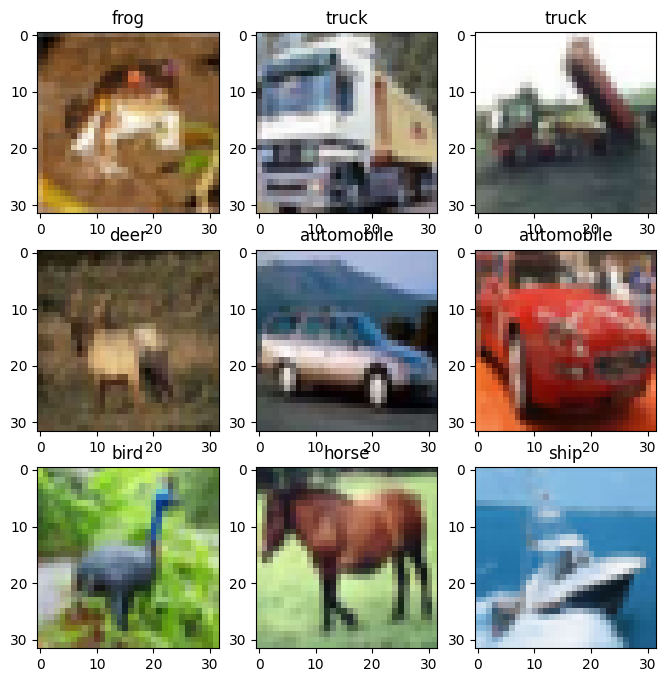

In [ ]:
# 2.a. Let's look into the dataset by visualizing some data opints
fig=plt.figure(figsize=(8, 8))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(X_train[i])
  plt.title(labels[y_train[i][0]])
plt.show()

2.b. Apply the pre-processing algorithms that we discussed last week. The augmented images are supposed to be seared by 20%, zoomed by 20% and horizontally flipped. Now, design a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has two hidden layers (512 and 256 nodes respectively). Draw the Learning curve. What is your understanding from learning curve?

In [ ]:
# 2.b
# Encoding output
y_train_c = to_categorical(y_train, num_classes = 10)
y_test_c = to_categorical(y_test, num_classes = 10)
# # create data generator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(X_train,y_train_c,subset='training')
it_val = datagen.flow(X_train,y_train_c,subset='validation')
# Create model here
model=Sequential()
model.add(Conv2D(32,5,activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32,5,activation='relu'))
model.add(Conv2D(64,5,activation='relu'))
model.add(Conv2D(64,5,activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.005, decay=1e-06,momentum=0.9),  metrics=['accuracy']) #Compile model
hist = model.fit(it_train, epochs=20, batch_size=128,validation_data=it_val)

Epoch 1/20
1250/1250 [==============================] - 36s 28ms/step - loss: 1.8793 - accuracy: 0.3098 - val_loss: 1.6454 - val_accuracy: 0.3953
Epoch 2/20
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5435 - accuracy: 0.4402 - val_loss: 1.4479 - val_accuracy: 0.4830
Epoch 3/20
1250/1250 [==============================] - 41s 33ms/step - loss: 1.4047 - accuracy: 0.4948 - val_loss: 1.3659 - val_accuracy: 0.5173
Epoch 4/20
1250/1250 [==============================] - 41s 33ms/step - loss: 1.2730 - accuracy: 0.5412 - val_loss: 1.2815 - val_accuracy: 0.5483
Epoch 5/20
1250/1250 [==============================] - 38s 30ms/step - loss: 1.1701 - accuracy: 0.5849 - val_loss: 1.1552 - val_accuracy: 0.5979
Epoch 6/20
1250/1250 [==============================] - 40s 32ms/step - loss: 1.0749 - accuracy: 0.6219 - val_loss: 1.0712 - val_accuracy: 0.6226
Epoch 7/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9938 - accuracy: 0.6509 - val_loss: 1.0398 -

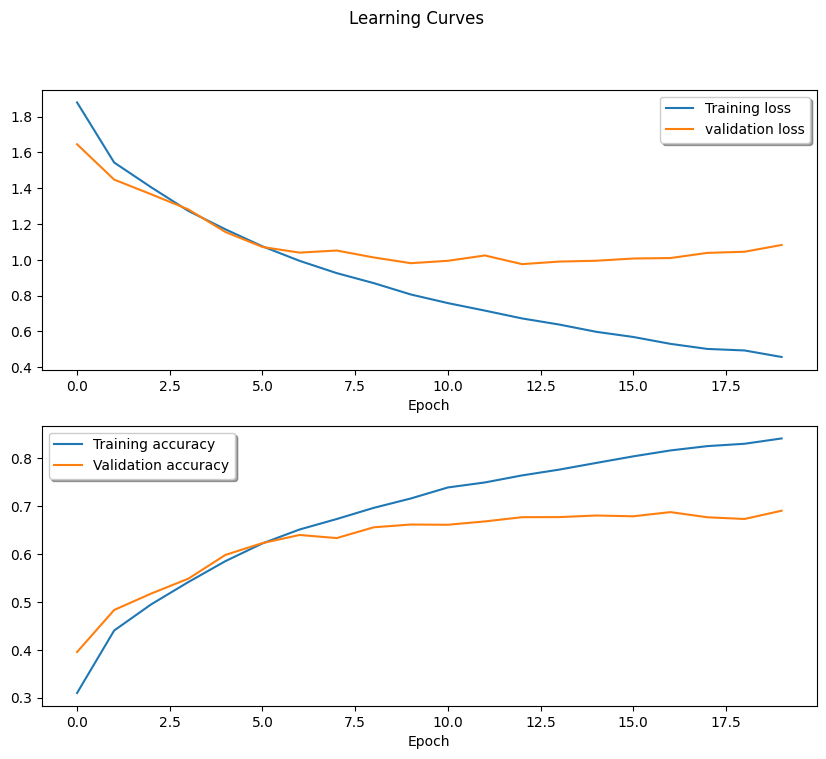

In [ ]:
# Draw learning curve here
learning_curve(hist)

This model is also demonstrating overfitting as seen by the validation loss starting to increase as the training loss continues to decrease. To fix this issue in a deep neural network, dropout or batch normalization can be introduced.

In [ ]:
#2.c. Solution to resolve overfitting
# One solution is adding drop out
# Implement your solution here and train model
model=Sequential()
model.add(Conv2D(32,5,activation='relu', input_shape = (32, 32, 3)))
model.add(Conv2D(32,5,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,5,activation='relu'))
model.add(Conv2D(64,5,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.005, decay=1e-06,momentum=0.9),  metrics=['accuracy']) #Compile model
hist = model.fit(it_train, epochs=20, batch_size=128, validation_data=it_val)

Epoch 1/20
1250/1250 [==============================] - 40s 31ms/step - loss: 2.1245 - accuracy: 0.1836 - val_loss: 1.8697 - val_accuracy: 0.2822
Epoch 2/20
1250/1250 [==============================] - 41s 33ms/step - loss: 1.8060 - accuracy: 0.3255 - val_loss: 1.6259 - val_accuracy: 0.4072
Epoch 3/20
1250/1250 [==============================] - 33s 26ms/step - loss: 1.6187 - accuracy: 0.4090 - val_loss: 1.4788 - val_accuracy: 0.4645
Epoch 4/20
1250/1250 [==============================] - 38s 30ms/step - loss: 1.5136 - accuracy: 0.4554 - val_loss: 1.4246 - val_accuracy: 0.5091
Epoch 5/20
1250/1250 [==============================] - 34s 27ms/step - loss: 1.4292 - accuracy: 0.4869 - val_loss: 1.2888 - val_accuracy: 0.5447
Epoch 6/20
1250/1250 [==============================] - 39s 31ms/step - loss: 1.3627 - accuracy: 0.5164 - val_loss: 1.2091 - val_accuracy: 0.5859
Epoch 7/20
1250/1250 [==============================] - 34s 27ms/step - loss: 1.3009 - accuracy: 0.5448 - val_loss: 1.1777 -

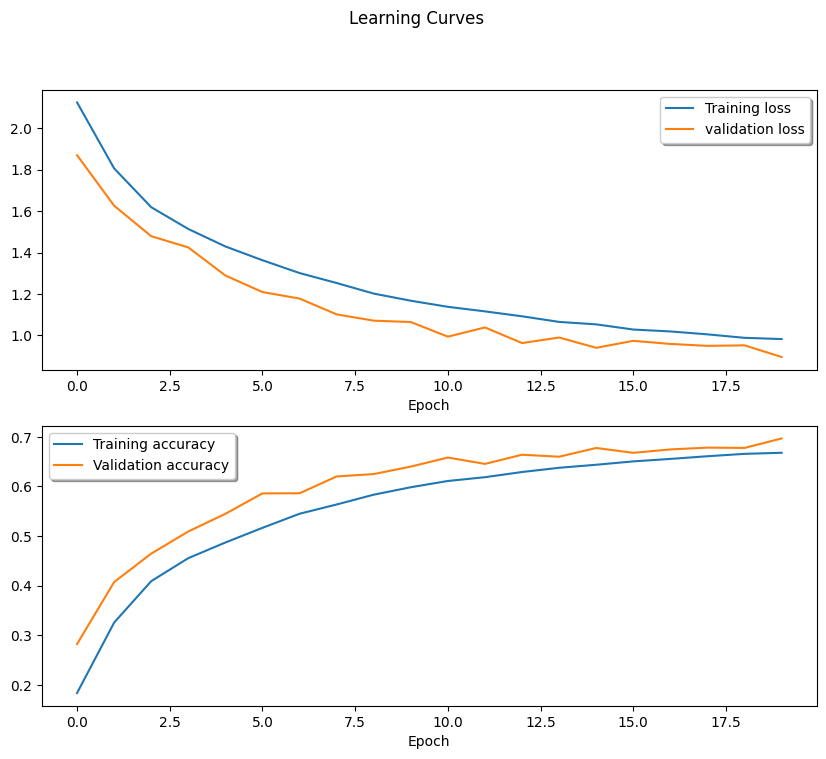

In [ ]:
# Draw learning curve
learning_curve(hist)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
# 2.d- This part is up to you to choose proper pre-trained model
# I chose VGG16 and RESNet50
# Implementing VGG16
# Model adapted from (Naveena, 2020)
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

vgg_model = VGG16(weights='imagenet',include_top=False,classes=10,input_shape=(32,32,3))
model = Sequential()
for layer in vgg_model.layers:
    model.add(layer)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.005, decay=1e-06,momentum=0.9),  metrics=['accuracy'])
hist = model.fit_generator(it_train, validation_data=it_val, epochs=10)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10


<ipython-input-19-2bdec2f3a13c>:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(it_train, validation_data=it_val, epochs=10)


1250/1250 [==============================] - 52s 40ms/step - loss: 1.4294 - accuracy: 0.4794 - val_loss: 1.0280 - val_accuracy: 0.6297
Epoch 2/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.8544 - accuracy: 0.7221 - val_loss: 0.6962 - val_accuracy: 0.7712
Epoch 3/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.6987 - accuracy: 0.7736 - val_loss: 0.5847 - val_accuracy: 0.8067
Epoch 4/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.6046 - accuracy: 0.8033 - val_loss: 0.5705 - val_accuracy: 0.8143
Epoch 5/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.5285 - accuracy: 0.8306 - val_loss: 0.5183 - val_accuracy: 0.8279
Epoch 6/10
1250/1250 [==============================] - 52s 41ms/step - loss: 0.4768 - accuracy: 0.8440 - val_loss: 0.4863 - val_accuracy: 0.8379
Epoch 7/10
1250/1250 [==============================] - 52s 42ms/step - loss: 0.4344 - accuracy: 0.8597 - val_loss: 0.4649 - val_accura

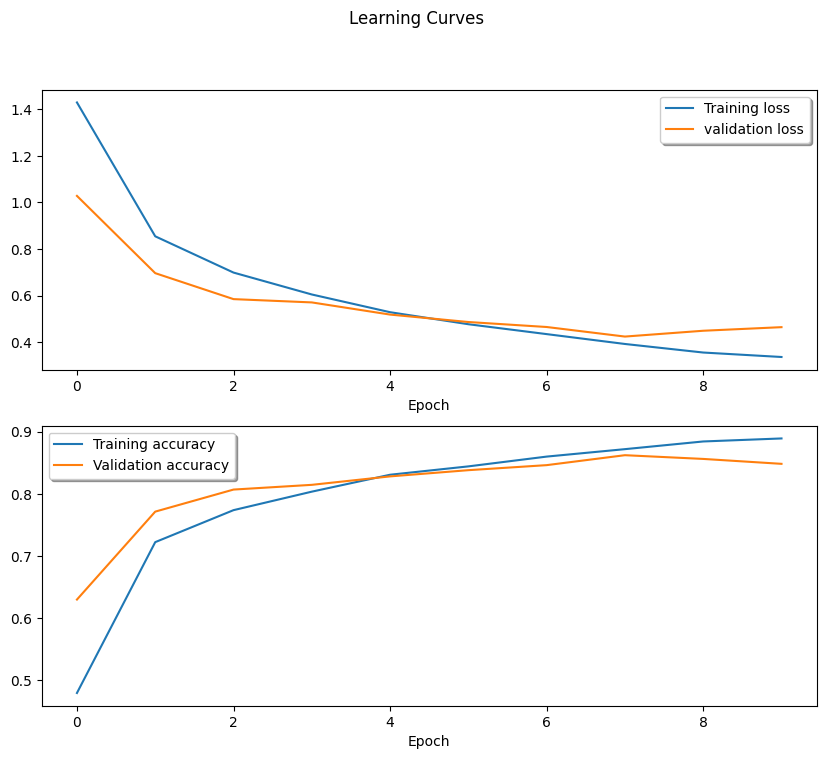

In [ ]:
learning_curve(hist)

In [ ]:
model.evaluate(X_test, y_test_c, batch_size=256, verbose=1)

40/40 [==============================] - 3s 26ms/step - loss: 45.1521 - accuracy: 0.6574


[45.152099609375, 0.6574000120162964]

In [ ]:
# This is my second pre-trained model
# Model adapted from (Kutlu, 2020)
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import GlobalAveragePooling2D

X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

def feature_extractor(inputs):
  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),include_top=False,weights='imagenet')(inputs)
  return feature_extractor

def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

def final_model(inputs):
    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)
    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)
    return classification_output

# Let's train the model using RMSprop
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  classification_output = final_model(inputs)
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
  return model

model = define_compile_model()
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
313/313 [==============================] - 481s 1s/step - loss: 0.9622 - accuracy: 0.6693 - val_loss: 1.3244 - val_accuracy: 0.5839
Epoch 2/10
313/313 [==============================] - 450s 1s/step - loss: 0.4194 - accuracy: 0.8569 - val_loss: 1.4059 - val_accuracy: 0.5989
Epoch 3/10
313/313 [==============================] - 450s 1s/step - loss: 0.2846 - accuracy: 0.9022 - val_loss: 0.8148 - val_accuracy: 0.7769
Epoch 4/10
313/313 [==============================] - 450s 1s/step - loss: 0.2067 - accuracy: 0.9291 - val_loss: 0.8578 - val_accuracy: 0.7739
Epoch 5/10
313/313 [==============================] - 450s 1s/step - loss: 0.1551 - accuracy: 0.9468 - val_loss: 1.0578 - val_accuracy: 0.7886
Epoch 6/10
313/313 [==============================] - 439s 1s/step - loss: 0.1197 - accuracy: 0.9601 - val_loss: 0.6305 - val_accuracy: 0.8171
Epoch 7/10
313/313 [==============================] - 439s 1s/step - loss: 0.0959 - accuracy: 0.9673 - val_loss: 0.7825 - val_accuracy: 0.8203

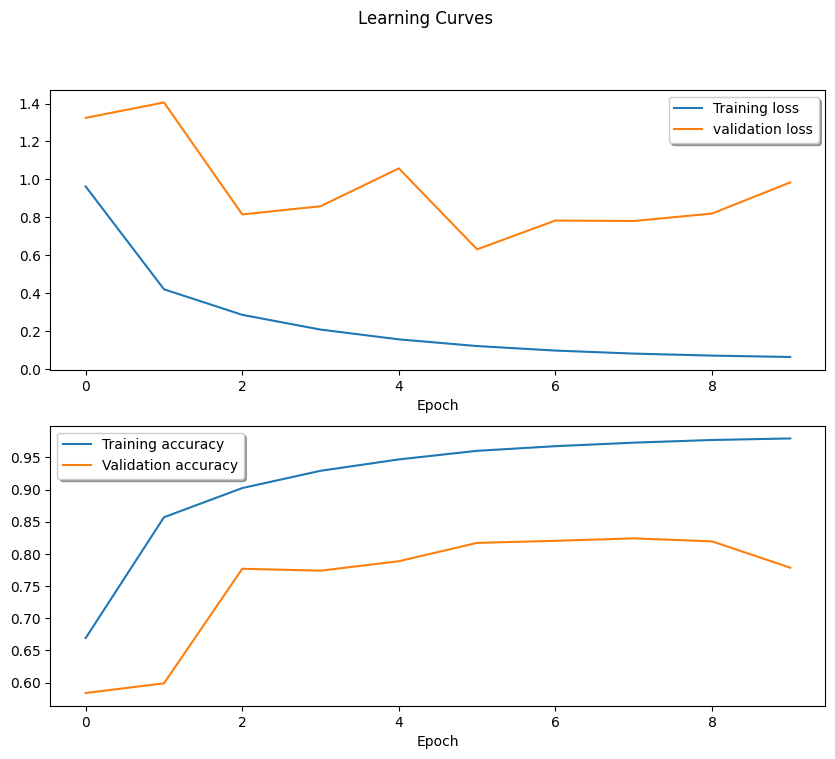

In [ ]:
learning_curve(hist)

In [ ]:
model.evaluate(X_test, y_test, batch_size=256, verbose=1)

40/40 [==============================] - 38s 760ms/step - loss: 0.9860 - accuracy: 0.7722


[0.9860312342643738, 0.7721999883651733]

The test accuracies for the models are around 66% and 77% for the VGG16 and ResNet50 model respectively. To compare the models, the majority of parameters are kept consistent between the two and the loss and accuracy on the test dataset is compared. In this case, the ResNet50 pre-trained model performed better on the test dataset, however, from the learning curves the VGG16 model has less overfitting and smoother curves. To get a better understanding of the models performances the recall, precision, and F1 scores can be computed and compared as well.

REFERENCES:

Kutlu, K. (2020). *ResNet50 Transfer Learning CIFAR-10 Beginner*. Kaggle. https://www.kaggle.com/code/kutaykutlu/resnet50-transfer-learning-cifar-10-beginner    
Lakshmanan, V., Gorner, M., & Gillard, R. (2021). *Practical machine learning for computer vision: End-to-end machine learning for images*. O'Reilly  
Naveena, K. (2020). *CIFAR-10 using VGG16*. Kaggle. https://www.kaggle.com/code/vtu5118/cifar-10-using-vgg16